# Sonar Rock vs Mine Prediction

In underwater environments (oceans, seas):
- Mines are dangerous and must be detected accurately
- Rocks are harmless but often look similar to mines in sonar readings
- Visibility is poor → cameras don’t work well
- Sonar is used instead

👉 The challenge:  
How do we automatically distinguish a mine from a rock using sonar signals?

## 1. Understand the Problem
### What is Sonar?
Sonar (SOund Navigation And Ranging) is a technology using sound waves to detect, locate, and map objects underwater by sending out sound pulses and analyzing the returning echoes, crucial for navigation, research, and finding submerged items like submarines or shipwrecks.
### Why classify rock vs mine?
Classifying rocks from mines in sonar prediction is crucial for maritime security, safety, and underwater exploration, as mines pose significant threats to vessels and infrastructure, while rocks are benign features, requiring accurate, automated distinction using machine learning to enhance situational awareness and reduce human error in complex underwater environments.
### Why this is a classification problem?
This is a classification problem because the goal is to assign a discrete "label" to an object based on its characteristics, rather than predicting a continuous numerical value. There are only two classes: either it be **Rock** or it be **Mine**.
### What inputs (features) mean conceptually?
Each row represents:
> One sonar signal reflection from an underwater object

Each column represents:
> Energy level of sonar waves at a specific frequency band

## 2. Importing required libraries
* **NumPy** → numerical operations later
* **Pandas** → reading & inspecting data
* **MatplotLib** → plot statistical diagrams
* **Scikit-learn** → models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 3. Data Loading and Inspection
> Sonar dataset has no column names, so we must tell pandas that.

In [2]:
sonar_data = pd.read_csv('sonar_data.csv', header=None)

### Shape of the dataset

In [3]:
sonar_data.shape

(208, 61)

### View first few rows

In [4]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Understand Columns
**🔹 Features (X)**
* Columns: 0 → 59
* Numeric values (float)

**🔹 Target (y)**
* Column: 60
* Categorical:
    * R → Rock
    * M → Mine

### Separate Features and Target

In [5]:
X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (208, 60)
Shape of target: (208,)


### Verify Class Distribution

In [6]:
y.value_counts()

60
M    111
R     97
Name: count, dtype: int64

### Basic Statistical Understanding

In [7]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### Check for Missing Values

In [8]:
sonar_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

Key observations:
* Dataset is clean (no missing values)
* Features are already numerical and well-scaled

## 4. Exploratory Data Analysis
EDA prevents:
* Garbage-in–garbage-out ML
* Wrong assumptions
* Silent bugs

### Class Distribution (Visual + Numeric)

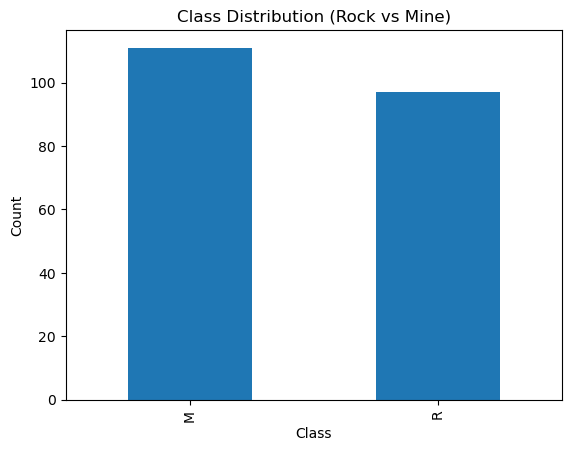

In [9]:
# Numeric count
y.value_counts()

# Visualize class distribution
y.value_counts().plot(kind='bar')
plt.title("Class Distribution (Rock vs Mine)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Feature Value Range Check

In [10]:
# Look at global min & max
X.min().min(), X.max().max()

(0.0, 1.0)

### Compare Rock vs Mine Statistically
> Do rocks and mines differ on average?

In [11]:
# Group-wise mean
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


### Visual Intuition
We don’t plot all 60 features (that’s messy). Instead, we sample a few.

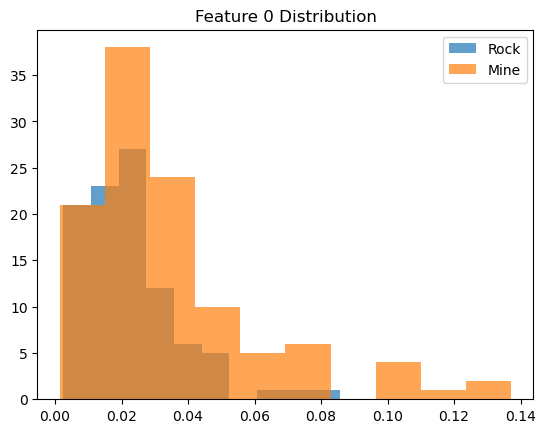

In [12]:
plt.hist(X.loc[y == 'R', 0], alpha=0.7, label='Rock')
plt.hist(X.loc[y == 'M', 0], alpha=0.7, label='Mine')
plt.legend()
plt.title("Feature 0 Distribution")
plt.show()

### Correlation Insight
Sonar features are:
* Sequential frequency bands
* Often correlated

In [13]:
X.corr().iloc[:5, :5]

,0,1,2,3,4
0,1.000000,0.735896,0.571537,0.491438,0.344797
1,0.735896,1.000000,0.779916,0.606684,0.419669
2,0.571537,0.779916,1.000000,0.781786,0.546141
3,0.491438,0.606684,0.781786,1.000000,0.726943
4,0.344797,0.419669,0.546141,0.726943,1.000000


## 5. Data Preprocessing
For this dataset, preprocessing involves:
1. Separating features & labels
2. Encoding labels (R, M) → numeric
3. Splitting data into training & testing sets
4. Standardizing features

### Encode Target Labels
R → 0  
M → 1

In [14]:
# Use LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check
np.unique(y_encoded)

array([0, 1])

### Train–Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Check shapes
X_train.shape, X_test.shape

((166, 60), (42, 60))

### Feature Scaling

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Model Selection & Training
* We use Logistic Regression for this project
* $\displaystyle{P(y=1∣X)=\frac1{1+e−(w⋅x+b)}}$
    * If Probability ≥ 0.5 → Mine
    * Else → Rock

In [17]:
# Create model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Check Training Completion

In [18]:
lr_model.coef_.shape

(1, 60)

### Prediction

In [19]:
train_predictions = lr_model.predict(X_train_scaled)

### Training Accuracy

In [20]:
train_accuracy = accuracy_score(y_train, train_predictions)
train_accuracy

0.9216867469879518

## 7. Model Evaluation

In [21]:
# Make predictions on test data
test_predictions = lr_model.predict(X_test_scaled)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
test_accuracy

0.8333333333333334

### Confusion Matrix

In [22]:
cm = confusion_matrix(y_test, test_predictions)
cm

array([[21,  1],
       [ 6, 14]])

How to read this:
|                 | Predicted Rock | Predicted Mine |
| --------------- | -------------- | -------------- |
| **Actual Rock** | 21             | 1              |
| **Actual Mine** | 6              | 14             |

Interpretation:
* 1 rocks misclassified as mines
* 6 mines misclassified as rocks (more dangerous)

### Classification Report (Precision, Recall, F1)
The Classification Report summarizes the performance of a classification model. It includes key metrics such as:
1. **Precision:** Measures the accuracy of positive predictions.
2. **Recall:** Indicates how many actual positives were correctly identified.
3. **F1-Score:** Balances precision and recall into a single score.
4. **Support:** Shows the number of samples for each class.

In [23]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



### Overfitting & Underfitting Check
**Signs of overfitting:** Training accuracy ≫ Test accuracy  
**Signs of underfitting:** Both accuracies low  
**My model:** Balanced → good baseline

### Model Confidence (Probabilities)

In [24]:
lr_model.predict_proba(X_test_scaled)[:5]

array([[0.01979049, 0.98020951],
       [0.33179701, 0.66820299],
       [0.45115435, 0.54884565],
       [0.55237656, 0.44762344],
       [0.64836935, 0.35163065]])

## 8. Model Comparison for Selection of Best Model
Model Comparison between **LogisticRegression**, **SVC**, **DecisionTreeClassifier** and **RandomForestClassifier**

### Importing necessary libraries

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

### Create Model Objects

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

### Train & Evaluate Each Model

In [27]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

### Comparison Results

In [28]:
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.3f}")

Logistic Regression: 0.833
SVC: 0.857
Decision Tree: 0.786
Random Forest: 0.881


### Results into a Table

In [29]:
comparison_df = pd.DataFrame({
    "Model": results.keys(),
    "Test Accuracy": results.values()
})

comparison_df

,Model,Test Accuracy
0,Logistic Regression,0.833333
1,SVC,0.857143
2,Decision Tree,0.785714
3,Random Forest,0.880952


### Visualize Comparison

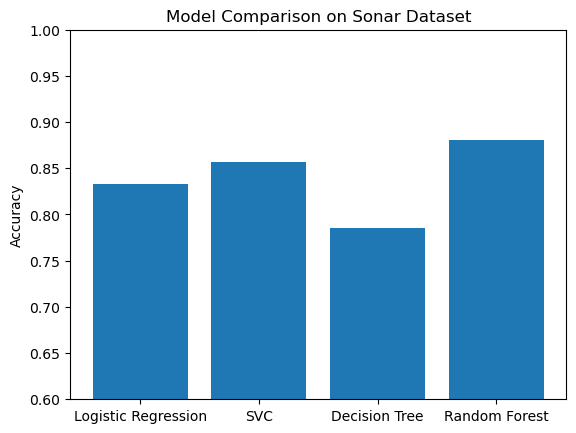

In [30]:
plt.bar(comparison_df["Model"], comparison_df["Test Accuracy"])
plt.title("Model Comparison on Sonar Dataset")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.show()

### Inference
Best Model based on accuracy score only is **Random Forest Classifier**. However, for real life best model selection are not solely based on accuracy score, we need to take into account other evaluation metrics, business context and model interpretability.

## 9. Build a Prediction System (End-to-End)
Instead of testing only on dataset rows, we want:

        Input → Model → Human-readable Output

In [31]:
# Load input data
input_df = pd.read_csv("sonarall-data.csv", header=None)

input_df.shape

# Convert to numpy arrays
X_new = input_df.values

X_new_scaled = scaler.transform(X_new)

# Make prediction
predictions = lr_model.predict(X_new_scaled)

# Predictions to human-readable labels
prediction_labels = ["Mine" if p == 1 else "Rock" for p in predictions]

# Adding confidence scores
probabilities = lr_model.predict_proba(X_new_scaled)
mine_confidence = probabilities[:, 1]

# Save predictions to a new CSV
output_df = input_df.copy()
output_df["Prediction"] = prediction_labels
output_df["Mine_Probability"] = mine_confidence
output_df.to_csv("sonarall_predictions.csv", index=False)

## 10. Conclusion

* Successfully built an end-to-end machine learning pipeline
* Compared multiple classification models under identical conditions
* Implemented a practical prediction system using CSV input
* Gained understanding of model behavior, evaluation, and deployment-ready inference

## 11. Future Work

* Hyperparameter tuning
* Cross-validation
* Deployment as an API or web application
* Feature importance analysis